In [1]:
import numpy as np
from scipy.spatial.transform import Rotation
import imufusion
import matplotlib.pyplot as pyplot
import numpy as np
import sys
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = np.genfromtxt(r"E:\Hsin\git\TWU\KaiCode\golf.csv", delimiter=",", skip_header=1)
timestamp = data[:, 0]
q = data[:, 10:14]
accelerometer = data[:, 7:10]
freeaccelerometer = data[:, 4:7]
gyroscope = data[:, 1:4]


In [8]:
def quatern2rotMat(q):
    """
    Converts a quaternion orientation to a rotation matrix.
    
    Parameters:
    q (numpy.array): Input quaternion in the form [w, x, y, z].
    
    Returns:
    R (numpy.array): Rotation matrix.
    """
    R = np.zeros((len(q), 3, 3))
    R[:, 0, 0] = 2 * (q[:, 0]**2) - 1 + 2 * (q[:, 1]**2)
    R[:, 0, 1] = 2 * (q[:, 1] * q[:, 2] + q[:, 0] * q[:, 3])
    R[:, 0, 2] = 2 * (q[:, 1] * q[:, 3] - q[:, 0] * q[:, 2])
    R[:, 1, 0] = 2 * (q[:, 1] * q[:, 2] - q[:, 0] * q[:, 3])
    R[:, 1, 1] = 2 * (q[:, 0]**2 - 1 + 2 * (q[:, 2]**2))
    R[:, 1, 2] = 2 * (q[:, 2] * q[:, 3] + q[:, 0] * q[:, 1])
    R[:, 2, 0] = 2 * (q[:, 1] * q[:, 3] + q[:, 0] * q[:, 2])
    R[:, 2, 1] = 2 * (q[:, 2] * q[:, 3] - q[:, 0] * q[:, 1])
    R[:, 2, 2] = 2 * (q[:, 0]**2 - 1 + 2 * (q[:, 3]**2))
    
    return R

In [9]:
rm = np.empty((len(timestamp), 3, 3))

rm = quatern2rotMat(q)

In [14]:
results = np.empty((np.shape(freeaccelerometer)))

# 使用 for 迴圈處理每個 frame 並計算點積
for i in range(np.shape(freeaccelerometer)[0]):
    results[i, :] = np.dot(rm[i, :, :], freeaccelerometer[i, :])* (180/np.pi)
    
    


In [16]:
def double_integration(global_acc, frequency):
    num_samples = len(global_acc)
    time_intervals = 1 / frequency
    velocity_data = np.zeros((num_samples, 3))
    position_data = np.zeros((num_samples, 3))

    for i in range(1, num_samples):
        delta_t = time_intervals
        velocity_data[i, :] = velocity_data[i - 1, :] + global_acc[i, :] * delta_t
        position_data[i, :] = position_data[i - 1, :] + velocity_data[i, :] * delta_t

    return position_data

In [17]:

frequency = 120
num_samples = 192
position_data = double_integration(results, frequency)

Text(0.5, 0, 'Z Position')

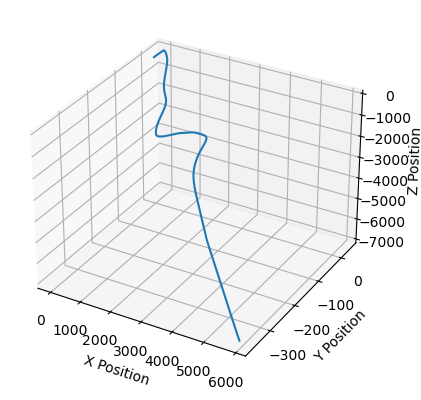

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(position_data[:, 0], position_data[:, 1], position_data[:, 2])
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
